In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from twitter_scraper import settings
from twitter_scraper.clean.tweets import TWEET_DTYPE

edges_df = pd.read_csv(settings.TWEETS_TEXT_CSV)
users_df = pd.read_csv(settings.USERS_CSV)
tweets_df = pd.read_csv(settings.TWEETS_CSV, dtype=TWEET_DTYPE)
edges_df = edges_df.set_index('rt_tweet_id').join(tweets_df[['id', 'week', 'month']].set_index('id')).reset_index()
edges_df['stemmed'] = edges_df['stemmed'].map(eval)

In [7]:
edges_df

index               source               target  \
0      1477078646632423427           2933183607             17563921   
1      1477085342650052615            492421400           2830148958   
2      1477090225964949505           2399966502           2538755274   
3      1477124083796086788             20970334            123230534   
4      1477171126157651969           2570937642            594112759   
...                    ...                  ...                  ...   
49176  1586313559554027520  1423909928335548416  1199258492034572291   
49177  1586313693608177664   886502120366723072  1199258492034572291   
49178  1586314312851001346            444097675            392221059   
49179  1586322617761681408  1477617445770780672  1388509951073656834   
49180  1586322957538062337             80316128             88064376   

                                               full_text          og_tweet_id  \
0      RT @monika_cro: Sretna Vam Nova 2022. godina! ...  1477054740290809856   
1      RT @RenatoPetek: Sretna 2022. ! 🎄🎇🥂💫 https://t...  1477055584788783104   
2      RT @Sokolov_krik: Dragi prijatelji, želimo vam...  1477088182038671104   
3      RT @rantalica: Ne volim petarde, al vatromet z...  1477055234396590080   
4      RT @mircosich1: After his arrest in 1972, Zlat...  1409837756189233152   
...                                                  ...                  ...   
49176  Pokažeš picu i guzicu pa zaradiš lovicu  https...  1586254294302740480   
49177  Work from home https://t.co/1uH4UgFOzy https:/...  1585923509892456448   
49178  PVRH @AndrejPlenkovic na #DanEura u Zagrebu: U...  1586310786804502528   
49179  RT @AnaMeow111: https://t.co/U8p4IpRyFl\nPiši ...  1586322448642965504   
49180  RT @DNEVNIKhr: Višestruki prekršitelji. #dnevn...  1586321758428319488   

       rt_time_elapsed_sec langid  \
0                      NaN     hr   
1                      NaN     am   
2                      NaN     hr   
3                      NaN     sl   
4                      NaN     en   
...                    ...    ...   
49176              14130.0     hr   
49177              93027.0     en   
49178                841.0     hr   
49179                  NaN     sk   
49180                  NaN     hr   

                                     full_text_transform  \
0      ['sretna', 'nova', 'godina', 'zagreb', 'hrvats...   
1                                             ['sretna']   
2      ['dragi', 'prijatelji', 'sretnu', 'blagoslovlj...   
3                 ['volim', 'petarde', 'al', 'vatromet']   
4      ['arrest', 'zlatko', 'tomičić', 'croatian', 'p...   
...                                                  ...   
49176  ['pokažeš', 'picu', 'guzicu', 'zaradiš', 'lovi...   
49177                                   ['work', 'home']   
49178  ['pvrh', 'daneura', 'zagrebu', 'ulazak', 'euro...   
49179                              ['piši', 'onlyfansu']   
49180        ['višestruki', 'prekršitelji', 'dnevnikhr']   

                                                 stemmed     week    month  
0                [sretan, nov, godina, Zagreb, hrvatski]  2022-00  2022-01  
1                                               [sretna]  2022-00  2022-01  
2      [drag, prijatelj, sretan, blagoslovljen, godin...  2022-00  2022-01  
3                        [voliti, petarda, al, vatromet]  2022-00  2022-01  
4      [arrest, zlatko, tomičić, croatian, poet, diss...  2022-00  2022-01  
...                                                  ...      ...      ...  
49176         [pokazati, pica, guzica, zaraditi, lovica]  2022-43  2022-10  
49177                                       [work, home]  2022-43  2022-10  
49178  [pvrh, daneur, zagreb, ulazak, eurozona, dodat...  2022-43  2022-10  
49179                                  [piši, onlyfansu]  2022-43  2022-10  
49180                [višestruk, prekršitelj, dnevnikhr]  2022-43  2022-10  

[49181 rows x 11 columns]

In [8]:
gdf = edges_df[['month', 'stemmed']].groupby('month').sum()

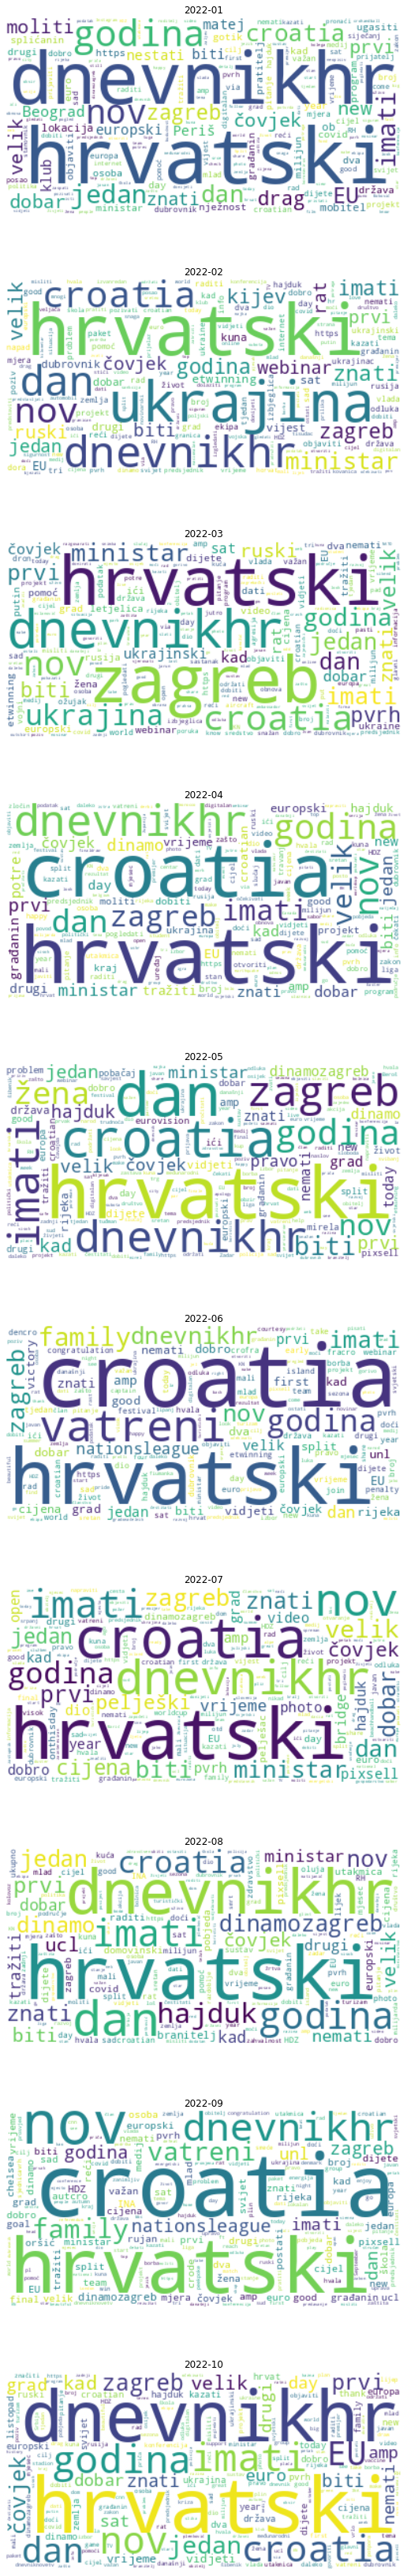

In [9]:
fig, axs = plt.subplots(len(gdf.index), figsize=(9, len(gdf.index)*6))

for i, month in enumerate(gdf.index):
    string = " ".join(list(filter(None, gdf.loc[month, 'stemmed'])))
    wordcloud = WordCloud(collocations=False, background_color='white').generate(string)
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(month)
    axs[i].axis('off')
plt.show()

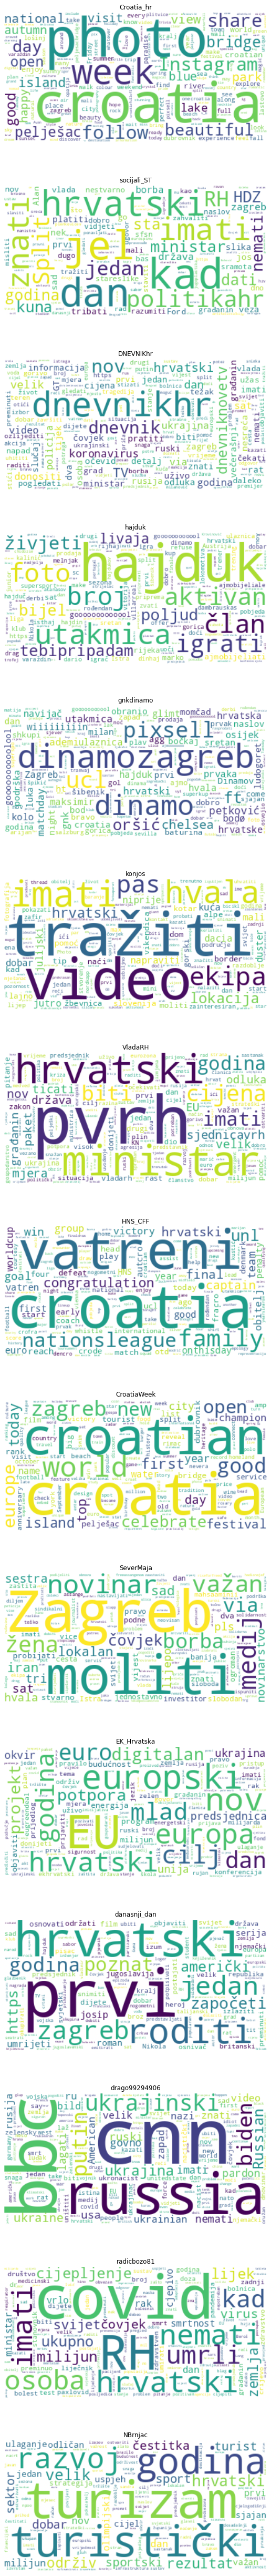

In [19]:
user_idx = users_df[['user_id', 'screen_name']].set_index('user_id').to_dict()['screen_name']

gdf = edges_df[['source', 'stemmed']].loc[edges_df['source'].isin(edges_df.source.value_counts().index[:15])].groupby('source').sum().reset_index()
gdf['source'] = gdf['source'].transform(lambda x: user_idx[x])
gdf = gdf.set_index('source')

fig, axs = plt.subplots(len(gdf.index), figsize=(9, len(gdf.index)*6))

for i, source in enumerate(gdf.index):
    string = " ".join(list(filter(None, gdf.loc[source, 'stemmed'])))
    wordcloud = WordCloud(collocations=False, background_color='white').generate(string)
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(source)
    axs[i].axis('off')
plt.show()